In [2]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

y = y.astype(int)
X = X / 255.0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_batch = X_train[:32]
y_batch = y_train[:32]

input_size = 784
num_class = 10

W = np.random.randn(input_size, num_class) * 0.01
b = np.zeros(num_class)

def forward(X, W, b):
  logits = X @ W + b
  return softmax(logits)

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def cross_entropy(probs, labels):
  return -np.log(probs[np.arange(len(probs)), labels]).mean()

def accuracy(probs, labels):
  preds = np.argmax(probs, axis=1)
  return np.mean(preds == labels)

def one_hot(labels, num_class):
  return np.eye(num_class)[labels]

def compute_gradient(X, probs, labels):
  y_true = one_hot(labels, num_class)
  batch_size = X.shape[0]

  dz = (probs - y_true) / batch_size
  dW = X.T @ dz
  db = np.sum(dz, axis=0)

  return dW, db

Epoch 0, Loss: 2.3003, Accuracy: 4.69%
Epoch 5000, Loss: 0.2770, Accuracy: 93.75%
Epoch 10000, Loss: 0.2726, Accuracy: 92.19%
Epoch 15000, Loss: 0.2454, Accuracy: 95.31%
Epoch 20000, Loss: 0.3436, Accuracy: 87.50%
Epoch 25000, Loss: 0.1641, Accuracy: 95.31%
Epoch 30000, Loss: 0.2226, Accuracy: 96.88%
Epoch 35000, Loss: 0.3269, Accuracy: 93.75%
Epoch 40000, Loss: 0.2905, Accuracy: 92.19%
Epoch 45000, Loss: 0.1816, Accuracy: 93.75%
Epoch 50000, Loss: 0.1549, Accuracy: 95.31%
Epoch 55000, Loss: 0.2035, Accuracy: 92.19%
Epoch 60000, Loss: 0.3176, Accuracy: 92.19%
Epoch 65000, Loss: 0.1676, Accuracy: 93.75%
Epoch 70000, Loss: 0.3467, Accuracy: 90.62%
Epoch 75000, Loss: 0.1238, Accuracy: 96.88%
Epoch 80000, Loss: 0.2714, Accuracy: 95.31%
Epoch 85000, Loss: 0.1452, Accuracy: 96.88%
Epoch 90000, Loss: 0.1955, Accuracy: 93.75%
Epoch 95000, Loss: 0.2581, Accuracy: 92.19%


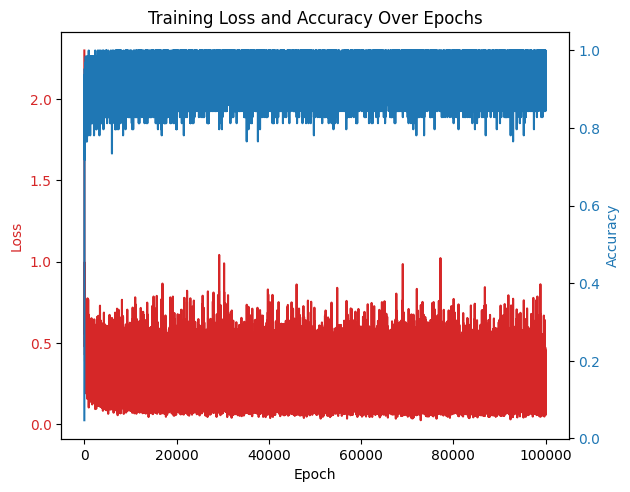

In [3]:
import matplotlib.pyplot as plt

# Initialize lists to store metrics
loss_history = []
accuracy_history = []

batch_size = 64
learning_rate = 0.1
num_epochs = 100000

for epoch in range(num_epochs):
    indices = np.random.choice(len(X_train), batch_size, replace=False)
    X_batch = X_train[indices]
    y_batch = y_train[indices]

    probs = forward(X_batch, W, b)

    y_pred = np.argmax(probs, axis=1)
    accuracy = np.mean(y_pred == y_batch)

    loss = cross_entropy(probs, y_batch)
    dW, db = compute_gradient(X_batch, probs, y_batch)

    W -= learning_rate * dW
    b -= learning_rate * db

    # Store metrics
    loss_history.append(loss)
    accuracy_history.append(accuracy)

    if epoch % 5000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.2%}")

# Plot training loss and accuracy
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(loss_history, color='tab:red', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(accuracy_history, color='tab:blue', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title("Training Loss and Accuracy Over Epochs")
plt.show()


In [4]:

probs_test = forward(X_test, W, b)
y_pred_test = np.argmax(probs_test, axis=1)

test_accuracy = np.mean(y_pred_test == y_test)
print(f"\nTest Accuracy: {test_accuracy:.2%}")
print("Sample Predictions:")
print("Predicted:", y_pred_test)
print("Actual:   ", y_test)



Test Accuracy: 92.19%
Sample Predictions:
Predicted: [8 4 5 ... 2 7 1]
Actual:    [8 4 8 ... 2 7 1]
